<a href="https://www.kaggle.com/code/abdulazizkomilov/amaliyot-simple-linear-regression?scriptVersionId=104576072" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


# Yuqoridagi jadvalda MohirDev MChJ tomonidan turli OAV larda (`TV`, `Radio`, `Newspaper`) berilgan reklamalar soni va mos keluvchi savdolar (`Sales`) berilgan.

**Sizning vazifangiz:**
1. Aynan qaysi turdagi OAVda reklama berish savdo o'sishiga ta'sir qiladi aniqlash
2. Topilgan bog'liqlik asosida Simple Linear Regression algorithmi yordamida bashorat modelini qurish.

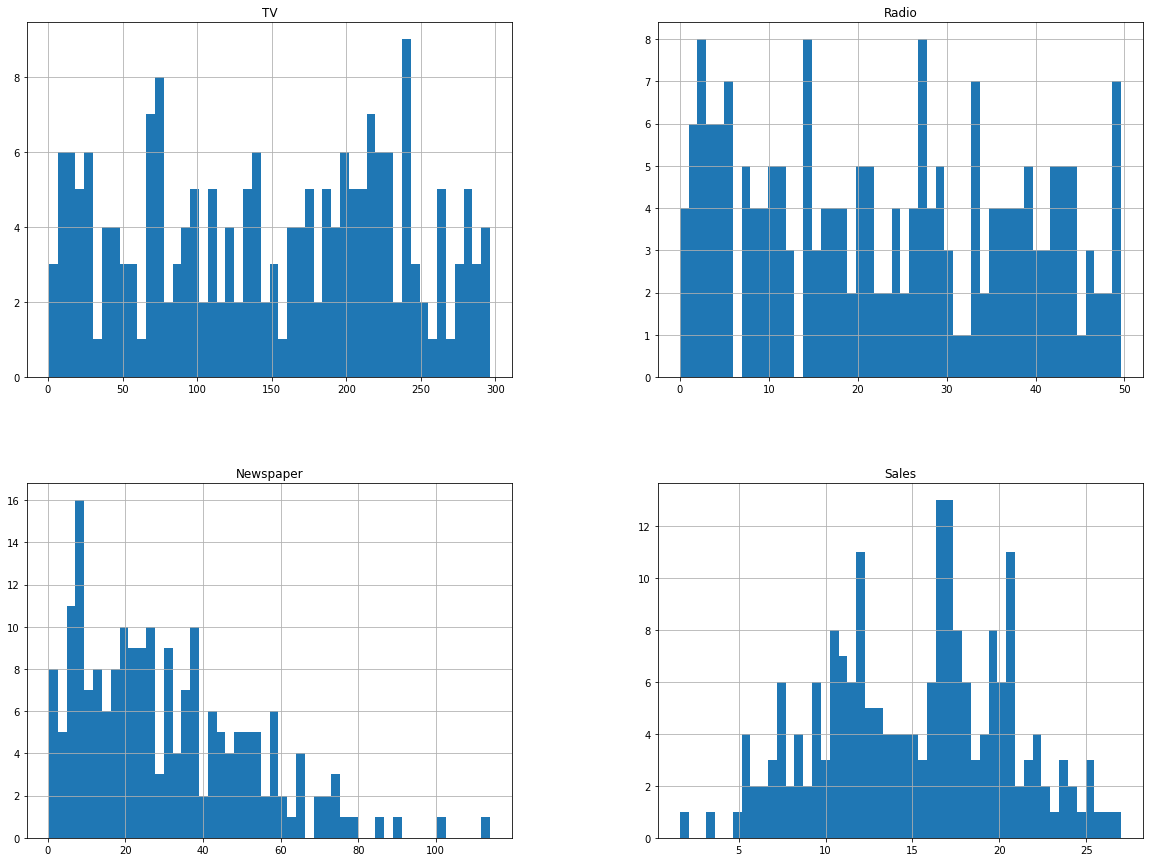

In [3]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# 'TV', 'Radio', 'Newspaper' ---> 'Sales' bilan bog'liqligi

**TV uchun**

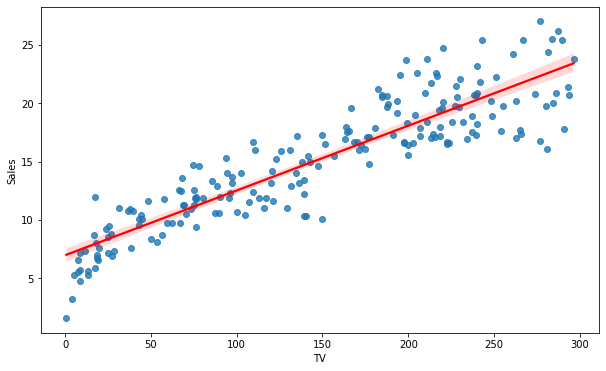

In [4]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='TV', y='Sales', line_kws={"color": "red"})
plt.show()

**Radio uchun**

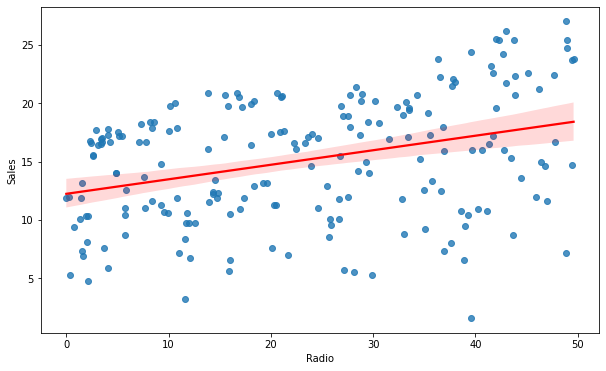

In [5]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Radio', y='Sales', line_kws={"color": "red"})
plt.show()

**Newspaper uchun**

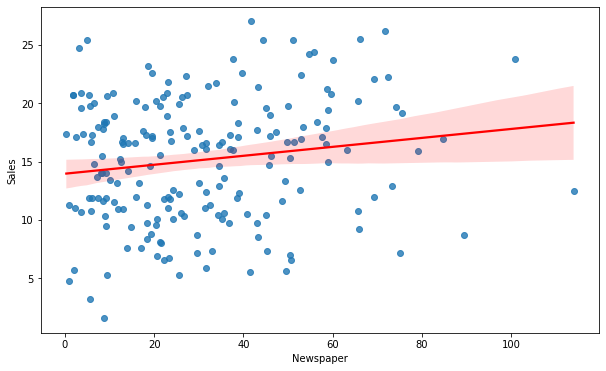

In [6]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Newspaper', y='Sales', line_kws={"color": "red"})
plt.show()

# Ko'rinib turibdiki eng katta bog'liqlik TV bilan
**Biz endi TV bilan davom ettiramiz**

In [7]:
X = df['TV'].to_numpy()
X

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

In [8]:
y = df['Sales'].to_numpy()
y

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

![](https://i.imgur.com/zZoXZxI.png)

**Bu yerda ~x - X ustun uchun o'rtracha qiymat, ~y - y ustun uchun o'rtracha qiymat**

In [9]:
Xmean = np.mean(X)
ymean = np.mean(y)

In [10]:
theta1 = sum((X-Xmean)*(y-ymean))/sum((X-Xmean)**2)
print(f"theta1={theta1}")

theta1=0.05546477046955879


In [11]:
theta0 = ymean - theta1*Xmean
print(f"theta0={theta0}")

theta0=6.974821488229903


![](https://i.imgur.com/iT5tffj.png)

In [12]:
x_test = df.sample(10, random_state=42)['TV'].to_numpy()
print(f"x_test={x_test}")
y_test = df.sample(10, random_state=42)['Sales'].to_numpy()
print(f"y_test={y_test}")

x_test=[163.3 195.4 292.9  11.7 220.3  75.1 216.8  50.  222.4 175.1]
y_test=[16.9 22.4 21.4  7.3 24.7 12.6 22.3  8.4 16.5 16.1]


In [13]:
y_predict = theta0 + theta1*x_test
print(f"y_predict={y_predict}")

y_predict=[16.03221851 17.81263764 23.22045276  7.6237593  19.19371042 11.14022575
 18.99958373  9.74806001 19.31018644 16.6867028 ]


![](https://i.imgur.com/GJH9CGy.png)

![](https://i.imgur.com/aXL9iWa.png)

In [14]:
# MAE
MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"MAE={MAE}")

MAE=2.261078526821641


# MAE=2.261078526821641

In [15]:
# RMSE
RMSE = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
print(f"RMSE={RMSE}")

RMSE=2.8038786286907422


# RMSE=2.8038786286907422

# Scikit-learn yordamida LR

**Keling endi yuqoridagi amallarni scikit-learn yordamida bajaramiz.**

**Avvalo ma'lumotlarni train va testga bo'lib olamiz.**

# Qadamlarni avtomatlashtiramiz qo'lda hisoblamaymiz

In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.10, random_state=42)

In [17]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['TV']])
y_train = np.asanyarray(train_set[['Sales']])

# Modelni tarbiyalaymiz (train)
LR_model.fit(x_train, y_train)

#theta1 va theta0 koeefisentlarni ajratib olamiz 
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'theta1={theta1}')
print (f'theta0={theta0}')

theta1=0.05513263076693964
theta0=7.044916461655207


# theta1=0.05513263076693964
# theta0=7.044916461655207

Text(0, 0.5, 'Sales')

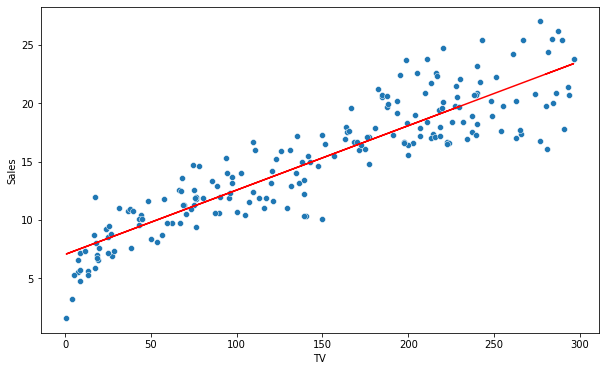

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("TV")
plt.ylabel("Sales")

# Modelni baholaymiz

In [19]:
x_test = np.asanyarray(test_set[['TV']])
y_test = np.asanyarray(test_set[['Sales']])

In [20]:
y_predict = LR_model.predict(x_test)
y_predict

array([[16.04807507],
       [17.81783251],
       [23.19326401],
       [ 7.68996824],
       [19.19063502],
       [11.18537703],
       [18.99767081],
       [ 9.801548  ],
       [19.30641354],
       [16.69864011],
       [ 8.78159433],
       [10.14337031],
       [19.97351838],
       [ 7.34263267],
       [14.73591845],
       [16.42849022],
       [ 7.44738467],
       [17.9391243 ],
       [11.19640356],
       [20.13340301]])

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"MAE={MAE}")
print(f"RMSE={RMSE}")

MAE=2.037955356968121
RMSE=2.5103822386472214


# Barcha ma'lumot bilan ishlaganda
**MAE=2.261078526821641**

**RMSE=2.8038786286907422**

# Train va Test bilan ishlaganda
**MAE=2.037955356968121**

**RMSE=2.5103822386472214**